In [3]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Load CelebA dataset

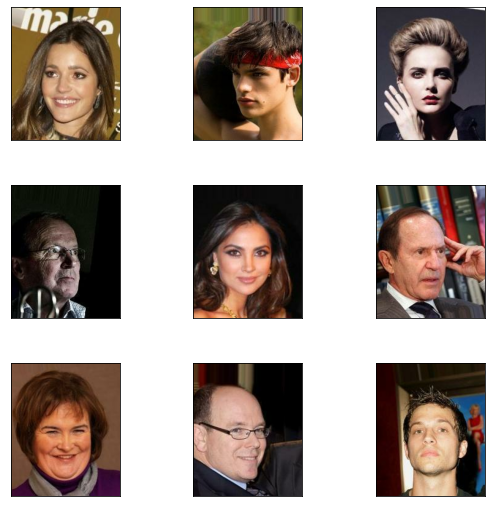

In [5]:
ds_train, ds_info = tfds.load('celeb_a', split='test', shuffle_files=False, with_info=True)
fig = tfds.show_examples(ds_info, ds_train)

## Take the first 2000 samples as our small dataset


In [6]:
sample_size = 2000
ds_train = ds_train.batch(sample_size)
features = next(iter(ds_train.take(1)))
n, h, w, c = features['image'].shape

## Generate new image by taking the mean of pixels

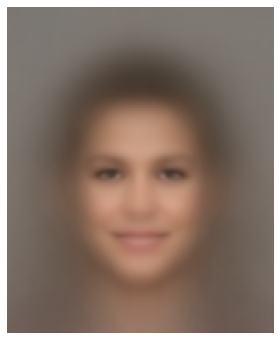

In [8]:
figure = plt.figure(figsize=(8,6))
sample_images = features['image']
new_image = np.mean(sample_images, axis=0)
plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()

## Sample images using attributes

In [15]:
def sample(req_attribs):
    sample_bool = []
    for i in range(sample_size):
        match = True
        for req_attrib in req_attribs:
            if features['attributes'][req_attrib][i] == False:
                match = False
                break
        sample_bool.append(match)
    return features['image'][np.array(sample_bool, dtype=np.bool)]


In [56]:
def sample_dataset(req_attribs):
    def sample_batch(features, req_attribs):
        sample_bool = []
        for i in range(sample_size):
            match = True
            for k, v in req_attribs.items():
                if features['attributes'][k][i] != v:
                    match = False
                    break
            sample_bool.append(match)
        return features['image'][np.array(sample_bool, dtype=np.bool)]
    
    samples = None
    for features in ds_train.take(9):
        mini_samples = sample_batch(features, req_attribs)
        if samples is not None:
            samples = np.append(samples, mini_samples, axis=0)
        else:
            samples = mini_samples

    return samples


In [50]:
## list all the attributes available
list(features['attributes'].keys())

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

attributes {'Male': True}
sample size: 6956


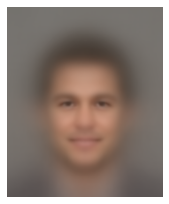

attributes {'Male': True, 'Eyeglasses': True}
sample size: 862


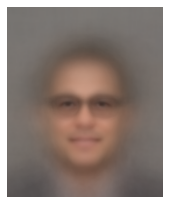

attributes {'Male': True, 'Eyeglasses': True, 'Mustache': True}
sample size: 122


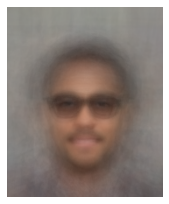

attributes {'Male': True, 'Eyeglasses': True, 'Mustache': True, 'Smiling': True}
sample size: 48


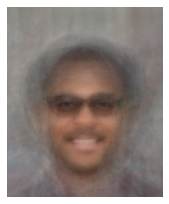

In [57]:
attributes_dict = {'Male':True, 
                   'Eyeglasses':True,
                   'Mustache':True,
                   'Smiling':True}
show_attribs = {}
for k, v in attributes_dict.items():
    show_attribs[k] = v
    sample_images = sample_dataset(show_attribs)
    print("attributes", show_attribs)
    print("sample size:",len(sample_images))
    new_image = np.mean(sample_images, axis=0)
    figure = plt.figure(figsize=(5,3.5))
    plt.axis('off')
    plt.imshow(new_image.astype(np.uint8))
    plt.show()

# Sample using median

attributes {'Male': False}
sample size: 11044


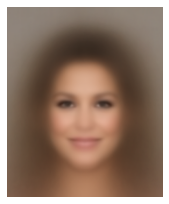

attributes {'Male': False, 'Eyeglasses': True}
sample size: 291


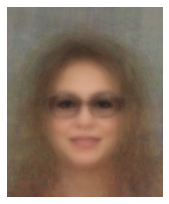

attributes {'Male': False, 'Eyeglasses': True, 'Smiling': False}
sample size: 143


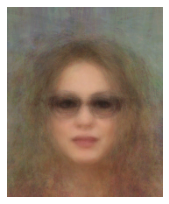

attributes {'Male': False, 'Eyeglasses': True, 'Smiling': False, 'Pointy_Nose': True}
sample size: 25


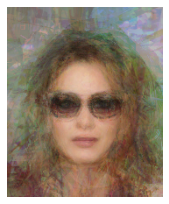

In [111]:
attributes_dict = {'Male':False,
                   'Eyeglasses': True,
                   'Smiling':False,
                   'Pointy_Nose':True,
                   }
show_attribs = {}
for k, v in attributes_dict.items():
    show_attribs[k] = v
    sample_images = sample_dataset(show_attribs)
    print("attributes", show_attribs)
    print("sample size:",len(sample_images))
    new_image = np.median(sample_images, axis=0)
    figure = plt.figure(figsize=(5,3.5))
    plt.axis('off')
    plt.imshow(new_image.astype(np.uint8))
    plt.show()

# Probabilistic Sampling

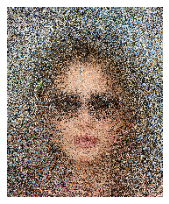

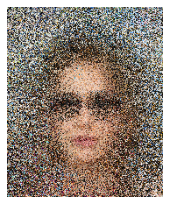

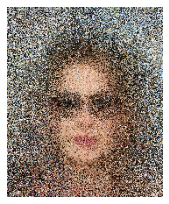

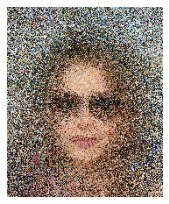

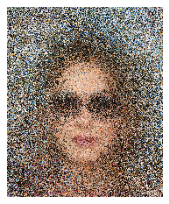

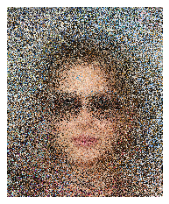

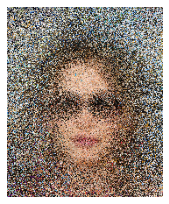

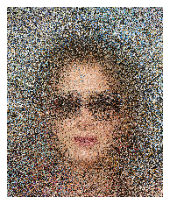

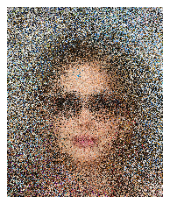

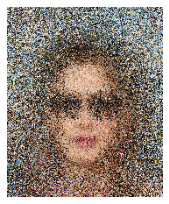

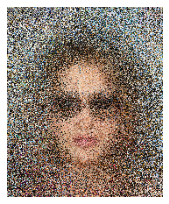

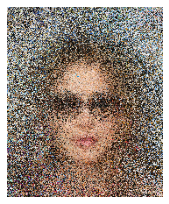

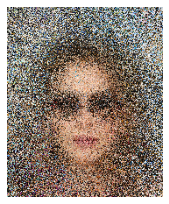

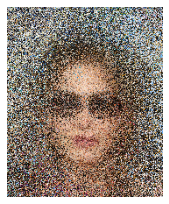

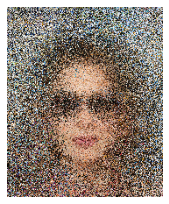

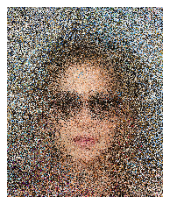

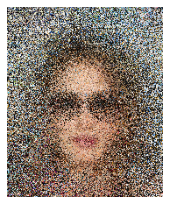

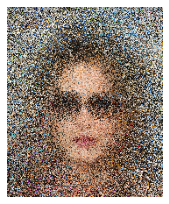

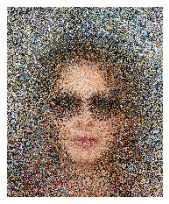

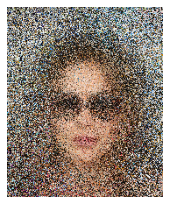

In [179]:
attributes_dict = {'Male':False,
                   'Eyeglasses': True,
                   'Smiling':False,
                   'Pointy_Nose':True,
                   }
sample_images = sample_dataset(attributes_dict)
new_image = np.zeros(sample_images.shape[1:], dtype=np.uint8)
for _ in range(20):
    for i in range(h):
        for j in range(w):
            rand_int = np.random.randint(0, sample_images.shape[0])
            new_image[i,j] = sample_images[rand_int,i,j]
    figure = plt.figure(figsize=(5,3.5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()